# Pymaceuticals Inc.
---

### Analysis
* Your analysis here ...

In [2]:
# Dependencies and Setup

import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from matplotlib import style
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from jupyterthemes import jtplot

#import seaborn as sns
#plt.style.use('seaborn-notebook')

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(study_results,mouse_metadata, how="left", on=["Mouse ID"])
mouse_study.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [3]:
mouse_study.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [4]:
# Display the data table for preview
organized_mouse_study = mouse_study[["Mouse ID","Timepoint","Tumor Volume (mm3)","Metastatic Sites","Drug Regimen",
                                     "Sex","Age_months","Weight (g)"]]
organized_mouse_study.head()
#organized_mouse_study.count()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# find out what is the duplciated item first: 
duplicate_mouse_id= organized_mouse_study.loc[organized_mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [6]:
# drop the duplicated mouse by isin function to have clean df | or can do: organized_mouse_study.loc[organized_mouse_study["Mouse ID"] !== "g989"]
# or: mouse_df = organized_mouse_study.drop_duplicates(subset=["Mouse ID"]): this is to drop all duplicated rows in df
mouse_df = organized_mouse_study[organized_mouse_study['Mouse ID'].isin(duplicate_mouse_id)==False]
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice.
mouse_unique = mouse_df["Mouse ID"].unique()
mouse_unique_number = len(mouse_unique)
mouse_unique_number

248

In [8]:
# Get all the data for the duplicate mouse ID. 

dupli_mouse_df = organized_mouse_study.loc[organized_mouse_study["Mouse ID"]== "g989"]
dupli_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


In [10]:
means = mouse_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = mouse_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
var = mouse_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
Dev = mouse_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
SEMs = mouse_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

In [11]:
summary_table = pd.DataFrame({"Mean Tumor Volume":means, "Median Tumor Volume":medians, "Tumor Volume Variance":var,
                              "Tumor Volume Std":Dev, "Tumor Volume Std. Err.":SEMs})
summary_table.head(20)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table_agg = summary_table.describe()
summary_table_agg.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std,Tumor Volume Std. Err.
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,50.975982,49.902123,47.858440,6.821103,0.502785
std,5.621289,4.705415,16.008423,1.216096,0.103473
min,40.216745,40.673236,23.486704,4.846308,0.320955
25%,52.388490,50.778739,40.249804,6.342952,0.475424


## Bar and Pie Charts

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
    #fig,ax = plt.subplot()
# Extract the neccessary values first:    

mice_plot_df = mouse_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})


mice_plot_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [14]:
mice_plot = mouse_df.groupby('Drug Regimen')["Mouse ID"].count()
mice_plot.head(15)

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

<AxesSubplot:xlabel='Drug Regimen'>

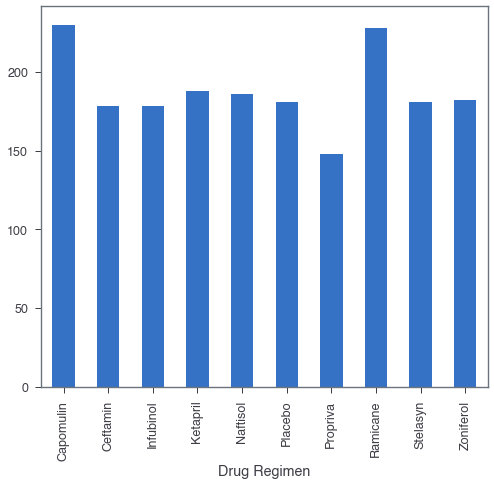

In [15]:
# create a bar plot using pandas showing the number of unique mice tested on each drug regimen
jtplot.style(theme = 'grade3', context='notebook', ticks=True, grid=False)
mice_plot.plot(kind = "bar")

In [16]:
mice_mouse = mouse_df[["Drug Regimen","Mouse ID","Sex"]]
mice_mouse.head()

,Drug Regimen,Mouse ID,Sex
0,Capomulin,b128,Female
1,Ketapril,f932,Male
2,Ketapril,g107,Female
3,Ketapril,a457,Female
4,Ketapril,c819,Male


In [17]:
# create a bar plot using pyplot showing the number of unique mice tested on each drug regimen

mice_mouse = mouse_df.groupby(["Drug Regimen"])["Mouse ID"].count()
mice_mouse.head()



Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Name: Mouse ID, dtype: int64

In [18]:
# use .agg to get a df but same value output
mice_mousedf = mouse_df.groupby("Drug Regimen").agg({"Mouse ID":"count"})
mice_mousedf.head()

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186


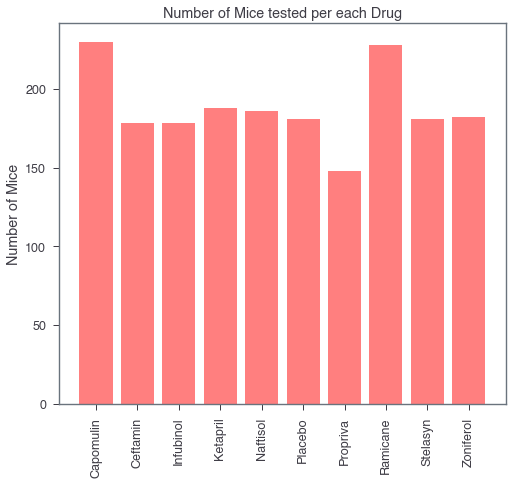

<Figure size 720x14400 with 0 Axes>

In [19]:
# using pyplot
x_Drug = mice_mousedf.index
y_Mice = mice_mousedf["Mouse ID"]
plt.bar(x_Drug, y_Mice, color='red', alpha=0.5, align="center")
plt.xticks(rotation="vertical")
plt.title("Number of Mice tested per each Drug")
#plt.xlabel("Drug")
plt.ylabel("Number of Mice")
plt.figure(figsize=(10,200))
#plt.savefig("Output/Education_states.png")
plt.show()


In [20]:
# optional: set the data for pandas plotting with mean and Drug
summary_plot_df = summary_table.reset_index()
summary_plot_df.head()


,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# find the F and M number each Drug| put into a df | conditional code to sum up | plot

mice_pie = mouse_df.groupby("Sex").agg({"Sex":"value_counts"})
mice_pie

,,Sex
Sex,Sex,
Female,Female,922
Male,Male,958


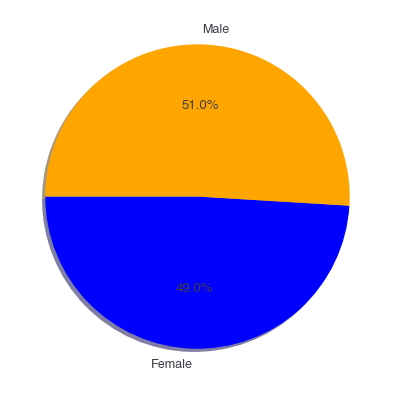

In [22]:
# ploting using pyplot
#jtplot.style(theme= “grade3”, context="notebook", ticks=True, grid=False)
#matplotlib.style.use('default')
x = ["Female","Male"]
y = [922,958]
colors = ["blue","orange"]
plt.pie(y, labels=x, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180
       )
plt.show()


array([<AxesSubplot:ylabel='Sex'>], dtype=object)

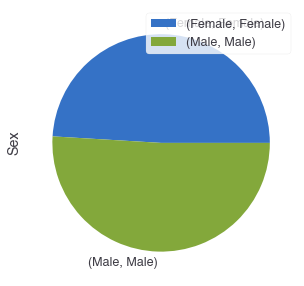

In [23]:
# # Generate a pie plot showing the distribution of female versus male mice using pandas

mice_pie.plot(kind='pie', subplots=True, figsize=(5, 5))
#mouse_df.groupby(['Sex']).values_count().plot(kind='pie', y='Sex')

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# groupy mouse ID and get .agg with max() in Timepoint

max_timepoint = mouse_df.groupby(mouse_df["Mouse ID"]).agg({"Timepoint":"max"})
max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_time_mouse = pd.merge(max_timepoint,mouse_df, how="left", on=["Mouse ID","Timepoint"])
merge_time_mouse.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [25]:
# extract the neccessary values out to a df for further works
extract = merge_time_mouse[["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen","Weight (g)"]]
extract.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen,Weight (g)
0,a203,45,67.973419,Infubinol,23
1,a251,45,65.525743,Infubinol,25
2,a262,45,70.717621,Placebo,29
3,a275,45,62.999356,Ceftamin,28
4,a366,30,63.440686,Stelasyn,29


In [26]:
# groupby from extract
Mouse_group = extract.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
Mouse_group.head()


Mouse ID
a203    67.973419
a251    65.525743
a262    70.717621
a275    62.999356
a366    63.440686
Name: Tumor Volume (mm3), dtype: float64

In [27]:
Drug_summary = extract.loc[(extract["Drug Regimen"] == "Capomulin") & (extract["Drug Regimen"] == "Ramicane") &
                          (extract["Drug Regimen"] == "Infubinol") & (extract["Drug Regimen"] == "Ceftamin")]
Drug_summary.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen,Weight (g)


In [44]:
# extract the lists of tumor Volume per Drug

Capo_tumor = extract.loc[extract["Drug Regimen"]=="Capomulin","Tumor Volume (mm3)"]
Rami_tumor = extract.loc[extract["Drug Regimen"]=="Ramicane","Tumor Volume (mm3)"]
Infu_tumor = extract.loc[extract["Drug Regimen"]=="Infubinol","Tumor Volume (mm3)"]
Cef_tumor = extract.loc[extract["Drug Regimen"]=="Ceftemin","Tumor Volume (mm3)"]


In [ ]:
# we can use the above tumor values to calculate quartiles | iqr | outlier

In [31]:
# extract mouse weights per Drug

Capo_weight = extract.loc[extract["Drug Regimen"]=="Capomulin","Weight (g)"]
Rami_weight = extract.loc[extract["Drug Regimen"]=="Ramicane","Weight (g)"]
Infu_weight = extract.loc[extract["Drug Regimen"]=="Infubinol","Weight (g)"]
Cef_weight = extract.loc[extract["Drug Regimen"]=="Ceftamin","Weight (g)"]
#print(Capo_weight)

In [32]:
#extract timepoint per Drug
Capo_timepoint = extract.loc[extract["Drug Regimen"]=="Capomulin","Timepoint"]
Rami_timepoint = extract.loc[extract["Drug Regimen"]=="Ramicane","Timepoint"]
Infu_timepoint = extract.loc[extract["Drug Regimen"]=="Infubinol","Timepoint"]
Cef_timepoint = extract.loc[extract["Drug Regimen"]=="Ceftamin","Timepoint"]
#print(Capo_timepoint)

In [33]:
#extract the lists of Mouse ID per Drug
Capo_mice = extract.loc[extract["Drug Regimen"]=="Capomulin","Mouse ID"]
Rami_mice = extract.loc[extract["Drug Regimen"]=="Ramicane","Mouse ID"]
Infu_mice = extract.loc[extract["Drug Regimen"]=="Infubinol","Mouse ID"]
Cef_mice = extract.loc[extract["Drug Regimen"]=="Ceftamin","Mouse ID"]
#print(len(Capo_mice) + len(Rami_mice)+ len(Infu_mice)+len(Cef_mice))
#print(Capo_mice)

In [34]:
# put the results into a df to make it clear to view: 

Capo_summary = pd.DataFrame({"Tumor Volume (mm3)": Capo_tumor,
                                 "Mouse Weights (g)": Capo_weight,
                                  "Mouse ID" : Capo_mice,
                                  "Time point": Capo_timepoint})
Capo_summary.head()

,Tumor Volume (mm3),Mouse Weights (g),Mouse ID,Time point
19,38.982878,22,b128,45
24,38.939633,21,b742,45
61,30.485985,17,f966,20
64,37.074024,19,g288,45
66,40.159220,22,g316,45


In [58]:
# another way: apply for loop to get the tumor volume of 4 treatment methods at once:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

for drug in treatment_list:
    
    tumor_vol = extract.loc[extract["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    tumor_vol_list.append(tumor_vol)
#print(tumor_vol_list)

In [45]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = extract.loc[extract["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    print(quartiles)

0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64


In [60]:
quartiles = final_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)  # lower the lower (1.5 times the iqr)|upper the upper () -> ouliers 
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
The the median of tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x7fe468b64fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe468b756a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe468b64bb0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe468b75dc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe468b80190>,
 'means': []}

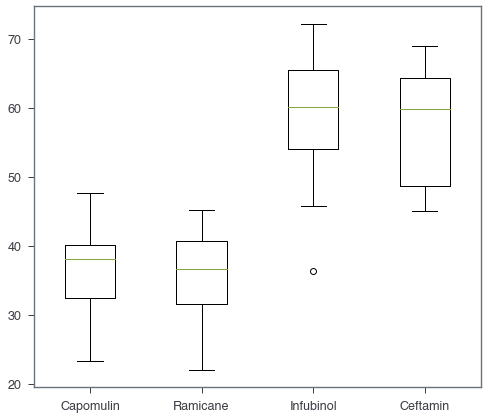

In [62]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()

plt.boxplot(tumor_vol_list,labels=treatment_list)

## Line and Scatter Plots

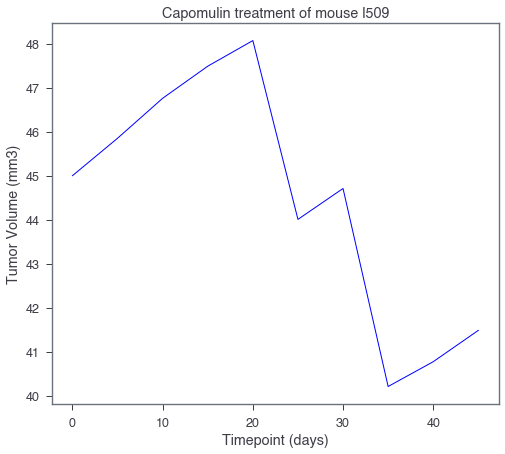

In [66]:
# Generate a line plot of tumor volume vs. time point for A Mouse (01 mouse) treated with Capomulin
capomulin_table = mouse_df.loc[mouse_df['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'],linewidth=1, color="blue")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

In [67]:
mousedata

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


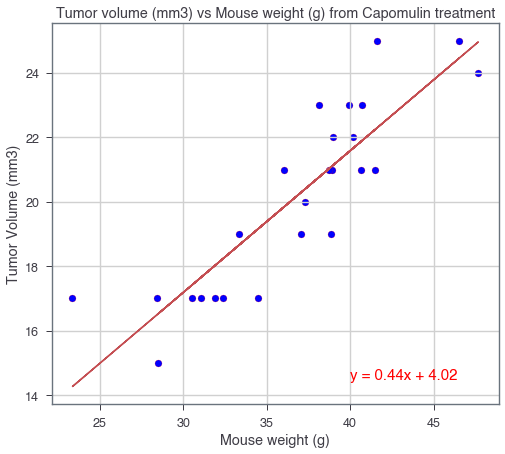

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_values = Capo_summary["Tumor Volume (mm3)"]
y_values = Capo_summary["Mouse Weights (g)"]
plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="red")
plt.title("Tumor volume (mm3) vs Mouse weight (g) from Capomulin treatment")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,14.5),fontsize=15,color="red")
plt.grid()
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation_coefficient = st.pearsonr(x_values,y_values)
print(f"the correlation between mouse weight and the average tumor volume is {correlation_coefficient}")

the correlation between mouse weight and the average tumor volume is (0.8767060403658113, 9.08442908867363e-09)


In [ ]:
# Findings: 
# the data show an uphill pattern as you move from left to right, 
# this indicates a positive relationship between mouse weight and tumor volume . 
# the higher the mouse_weight, the tumor volume (mm3) tend to be bigger. 